In [2]:
pip install wandb

     |████████████████████████████████| 1.4MB 13.5MB/s 
     |████████████████████████████████| 163kB 49.9MB/s 
     |████████████████████████████████| 102kB 12.7MB/s 
     |████████████████████████████████| 102kB 13.6MB/s 
     |████████████████████████████████| 112kB 53.2MB/s 
     |████████████████████████████████| 71kB 11.0MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
  Created wheel for gql: filename=gql-0.2.0-cp36-none-any.whl size=7630 sha256=c086fba7beae8213fc6084c9e869061dd761171db9c0287dcf148447daaa701e
  Stored in directory: /root/.cache/pip/wheels/ce/0e/7b/58a8a5268655b3ad74feef5aa97946f0addafb3cbb6bd2da23
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp36-none-any.whl size=6489 sha256=fd4174bc8f6bd53a4f44ef31b3587cb3f34546411cf65ea7dac542d39d28bccc
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for watchdog: filename=watchdog-0.10.3-cp36-none-any.whl size=73870 sha256

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
import wandb
from tensorflow.keras.models import model_from_json
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, UpSampling2D,BatchNormalization
import random
import glob
import wandb
from wandb.keras import WandbCallback
import subprocess
import os
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow, figure
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.__version__)

Num GPUs Available:  1
2.2.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [21]:
#initialize wandb and download dataset

hyperparams = {"num_epochs": 10, 
          "batch_size": 1,
          "height": 500,
          "width": 500}

wandb.init(config=hyperparams)
config = wandb.config
##########
val_dir='/content/drive/My Drive/catz/SIHtestdata'
train_dir='/content/drive/My Drive/catz/tir_10test'
###########testing path
#val_dir='/content/drive/My Drive/catz/website_data/23'
############


In [38]:
# generator to loop over train and test images
#####
def my_generator3(batch_size, img_dir):
    """A generator that returns 5 images plus a result image"""
    cat_dirs = glob.glob(img_dir + "/*")
    counter = 0
    while True:
        input_images = np.zeros(
            (batch_size,config.height, config.width,9*1))
        output_images = np.zeros((batch_size,config.height, config.width,1))
        #random.shuffle(cat_dirs)
        if (counter+batch_size >= len(cat_dirs)):
            counter = 0
           # (np.array(im.resize((96,96),Image.ANTIALIAS))
        for i in range(batch_size):
            input_imgs = glob.glob(cat_dirs[counter+i] + "/[0-9]*")
            imgs=[cv2.imread(img,-1).astype(np.float32) for img in sorted(input_imgs)]
            imgs1=[np.reshape(cv2.resize(im,(500,500),interpolation=cv2.INTER_NEAREST),(500,500,1)) for im in imgs]
            #imgs = [Image.open(img) for img in sorted(input_imgs)]
            #imgs1=[np.reshape((im.resize((500,500),Image.ANTIALIAS)),(500,500,1)) for im in imgs]   

            #imgs1=[cv2.resize(im,(500,500),interpolation=cv2.INTER_NEAREST) for im in imgs]

            input_images[i]=np.concatenate((imgs1),axis=2)
            #output_images[i] = np.reshape(Image.open(cat_dirs[counter + i] + "/result.tif"),(984, 1074, 1)).resize((500,500,1),Image.ANTIALIAS)
            output_images[i] =np.reshape(cv2.resize((cv2.imread((cat_dirs[counter+i]+"/result.tif"),-1).astype(np.float32)),(500,500),interpolation=cv2.INTER_NEAREST),(500,500,1))            
            #input_images[i] /= 255.
            #output_images[i] /= 255.            
            input_images[i] /= 3.
            output_images[i] /= 3.
        yield (input_images, output_images)
        counter =counter+batch_size
        
#steps_per_epoch = len(glob.glob(train_dir + "/*")) // config.batch_size
#validation_steps = len(glob.glob(val_dir + "/*")) // config.batch_size

In [9]:
# generator to loop over train and test images
####fro 9 iimages
def my_generator3(batch_size, img_dir):
    """A generator that returns 5 images plus a result image"""
    cat_dirs = glob.glob(img_dir + "/*")
    counter = 0
    while True:
        input_images = np.zeros(
            (batch_size,config.height, config.width,5*1))
        output_images = np.zeros((batch_size,config.height, config.width,1))
        #random.shuffle(cat_dirs)
        if (counter+batch_size >= len(cat_dirs)):
            counter = 0
           # (np.array(im.resize((96,96),Image.ANTIALIAS))
        for i in range(batch_size):
            input_imgs = glob.glob(cat_dirs[counter+i] + "/[1-5]_VIS*")
            imgs=[cv2.imread(img,-1).astype(np.float32) for img in sorted(input_imgs)]
            imgs1=[np.reshape(cv2.resize(im,(500,500),interpolation=cv2.INTER_NEAREST),(500,500,1)) for im in imgs]
            #imgs = [Image.open(img) for img in sorted(input_imgs)]

            input_images[i]=np.concatenate((imgs1),axis=2)
            #output_images[i] = np.reshape(Image.open(cat_dirs[counter + i] + "/result.tif"),(984, 1074, 1)).resize((500,500,1),Image.ANTIALIAS)
            output_images[i] =np.reshape(cv2.resize((cv2.imread((cat_dirs[counter+i]+"/5_VIS.tif"),-1).astype(np.float32)),(500,500),interpolation=cv2.INTER_NEAREST),(500,500,1))            
            input_images[i] /= 255.
            output_images[i] /= 255.            
            input_images[i] /= 3.
            output_images[i] /= 3.
        yield (input_images, output_images)
        counter =counter+batch_size
        
#steps_per_epoch = len(glob.glob(train_dir + "/*")) // config.batch_size
#validation_steps = len(glob.glob(val_dir + "/*")) // config.batch_size

In [11]:
#callback to log the images

class ImageCallback(Callback):
    def on_epoch_end(self, epoch, logs):
        validation_X, validation_y = next(
            my_generator3(config.batch_size, val_dir))
        output = self.model.predict(validation_X)
        """wandb.log({
            "input": [wandb.Image(np.concatenate(np.split(c, 5, axis=2), axis=1)) for c in validation_X],
            "output": [wandb.Image(np.concatenate([validation_y[i], o], axis=1)) for i, o in enumerate(output)]
        }, commit=False)"""

In [39]:
# Test the generator
tt='/content/drive/My Drive/catz/testfinal'
gen = my_generator3(1, tt)
videos, next_frame = next(gen)
print(videos[0].shape)
next_frame[0].shape

(500, 500, 9)


(500, 500, 1)

**INITIAL 9 IMAGE**

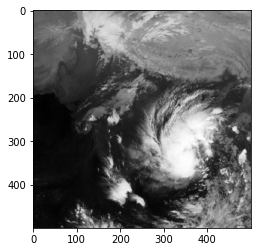

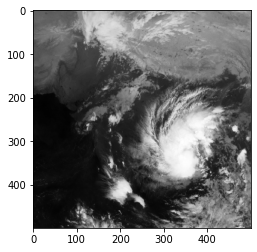

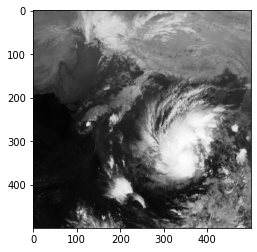

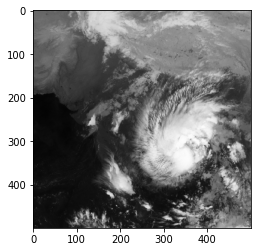

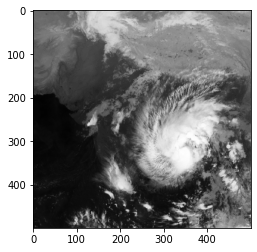

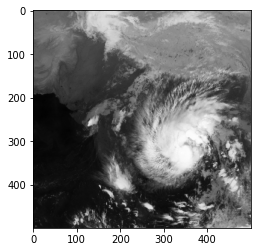

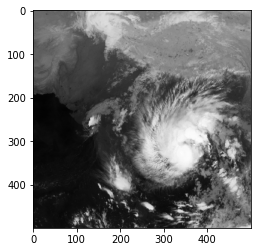

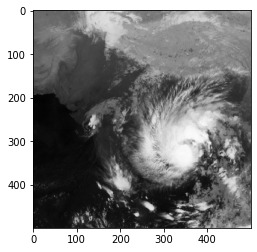

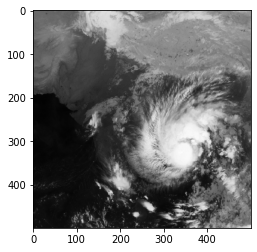

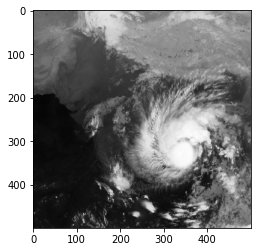

In [29]:
figure()
imshow(videos[0][:,:,0],cmap='gray')
figure()
imshow(videos[0][:,:,1],cmap='gray')
figure()
imshow(videos[0][:,:,2],cmap='gray')
figure()
imshow(videos[0][:,:,3],cmap='gray')
figure()
imshow(videos[0][:,:,4],cmap='gray')
figure()
imshow(videos[0][:,:,5],cmap='gray')
figure()
imshow(videos[0][:,:,6],cmap='gray')
figure()
imshow(videos[0][:,:,7],cmap='gray')
figure()
imshow(videos[0][:,:,8],cmap='gray')
figure()
imshow(next_frame[0][:,:,0],cmap='gray')

In [ ]:
# Function for measuring how similar two images are
def perceptual_distance(y_true, y_pred):
    y_true *= 255.
    y_pred *= 255.
    rmean = (y_true[:, :, :, 0] + y_pred[:, :, :, 0]) / 2
    r = y_true[:, :, :, 0] - y_pred[:, :, :, 0]
    g = y_true[:, :, :, 1] - y_pred[:, :, :, 1]
    b = y_true[:, :, :, 2] - y_pred[:, :, :, 2]
    #g=b=r
    return K.mean(K.sqrt((((512+rmean)*r*r)/256) + 4*g*g + (((767-rmean)*b*b)/256)))

# model1


In [ ]:
# Conv2DLSTM with Gaussian Noise

from tensorflow.keras.layers import Lambda, Reshape, Permute, Input, add, Conv3D, GaussianNoise, ConvLSTM2D
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l1
def slice(x):
    return x[:,:,:,:, -1]

wandb.init(config=hyperparams)
config = wandb.config
n_frames=9
inp = Input((config.height, config.width, n_frames * 1))
reshaped = Reshape((config.height,config.width,n_frames,1))(inp)
permuted = Permute((1,2,4,3))(reshaped)
noise = GaussianNoise(0.1)(permuted)
last_layer = Lambda(slice, input_shape=(config.width,config.height,next_frame,1), output_shape=(config.width,config.height,1))(noise)
permuted_2 = Permute((4,1,2,3))(noise)

conv_lstm_output_1 = ConvLSTM2D(6, (3,3), padding='same',return_sequences=True)(permuted_2)
###############
conv_lstm_output_1=(BatchNormalization())(conv_lstm_output_1)
conv_lstm_output_1=Dropout(.2)(conv_lstm_output_1)

# conv_lstm_output_1 =(TimeDistributed(MaxPooling2D(pool_size=(2,2))))(conv_lstm_output_1)

conv_lstm_output_1 = ConvLSTM2D(6, (3,3), padding='same',activity_regularizer=l1(0.0001),return_sequences=True)(conv_lstm_output_1)
conv_lstm_output_1=(BatchNormalization())(conv_lstm_output_1)
conv_lstm_output_1=Dropout(.3)(conv_lstm_output_1)

conv_lstm_output_1 = ConvLSTM2D(6, (3,3), padding='same')(conv_lstm_output_1)
conv_lstm_output_1=(BatchNormalization())(conv_lstm_output_1)
conv_lstm_output_1=Dropout(.4)(conv_lstm_output_1)


conv_lstm_output_1 = Conv2D(3, (3,3), padding="same",activity_regularizer=l1(0.0001))(conv_lstm_output_1)###
################
conv_output = Conv2D(1, (3,3), padding="same")(conv_lstm_output_1)
combined = add([last_layer, conv_output])
model=Model(inputs=[inp], outputs=[combined])

model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

model.fit_generator(my_generator3(config.batch_size*2, train_dir),
                    steps_per_epoch=steps_per_epoch//4,
                    epochs=config.num_epochs, callbacks=[  
    ImageCallback(), WandbCallback()],
    validation_steps=validation_steps//4,
    validation_data=my_generator3(config.batch_size*2, val_dir))

In [ ]:
for i in range(1):
  wandb.init(config=hyperparams)
  config = wandb.config

  model.fit_generator(my_generator3(config.batch_size*2, train_dir),
                    steps_per_epoch=steps_per_epoch//4,
                    epochs=config.num_epochs, callbacks=[  
    ImageCallback(), WandbCallback()],
    validation_steps=validation_steps//4,
    validation_data=my_generator3(config.batch_size*2, val_dir))

In [ ]:
json_file=model.to_json()
#json_file_path="/content/drive/My Drive/catz/MODELS"
with open("model_last5","w") as file:
    file.write(json_file)
    
    
#weights to HDF5
model.save_weights("model_last5.h5")


In [ ]:
# json_file=model.to_json()
# #json_file_path="/content/drive/My Drive/catz/MODELS"
# with open("model_10","w") as file:
#     file.write(json_file)
    
    
# #weights to HDF5
# model.save_weights("model_10.h5")

file=open("model_last3",'r')
model_json=file.read()
file.close()

model=model_from_json(model_json)

# #load weights
model.load_weights("model_last3.h5")
#model.summary()
#model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
json_file=model.to_json()
#json_file_path="/content/drive/My Drive/catz/MODELS"
with open("model_10(3)","w") as file:
    file.write(json_file)
    
    
#weights to HDF5
model.save_weights("model_10(3).h5")



#load json
file=open("model_10(3)",'r')
model_json=file.read()
file.close()

model=model_from_json(model_json)

# #load weights
model.load_weights("model_10(3).h5")
# model3.summary()

In [47]:
file=open("model_last3",'r')
model_json=file.read()
file.close()

model=model_from_json(model_json)

# #load weights
model.load_weights("model_last3.h5")

In [48]:
result=model.predict(videos)

**Actual**

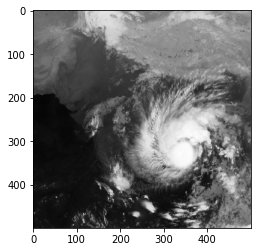

In [46]:
imshow(next_frame[0][:,:,0],cmap='gray')

**Predicted**

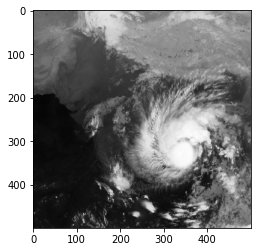

In [53]:
imshow(result[0][:,:,0],cmap='gray')

In [ ]:
# Conv2DLSTM with Gaussian Noise

from tensorflow.keras.layers import Lambda, Reshape, Permute, Input, add, Conv3D, GaussianNoise, concatenate
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, TimeDistributed, Add
from tensorflow.keras.models import Model

def slice(x):
    return x[:,:,:,:, -1]

wandb.init(config=hyperparams)
config = wandb.config

c=3

inp = Input((config.height, config.width, 5 * 1))
reshaped = Reshape((config.height, config.width, 5 ,1))(inp)
permuted = Permute((1,2,4,3))(reshaped)
print("per=",permuted)
noise = GaussianNoise(0.1)(permuted)
print("noise",noise.shape)
last_layer = Lambda(slice, input_shape=(config.height, config.width, 5,1), output_shape=(config.height, config.width, 1))(noise)
x = Permute((4,1,2,3))(noise)
x =(ConvLSTM2D(filters=c, kernel_size=(3,3),padding='same',name='conv_lstm1', return_sequences=True))(x)
print("X1",x)
c1=(BatchNormalization())(x)
print("c1",c1)
x = Dropout(0.2)(x)
print("Drop",x)
x =(TimeDistributed(MaxPooling2D(pool_size=(2,2))))(c1)
print("X2",x)
x =(ConvLSTM2D(filters=2*c,kernel_size=(3,3),padding='same',name='conv_lstm3',return_sequences=True))(x)
c2=(BatchNormalization())(x)
x = Dropout(0.2)(x)

x =(TimeDistributed(MaxPooling2D(pool_size=(2,2))))(c2)
x =(ConvLSTM2D(filters=4*c,kernel_size=(3,3),padding='same',name='conv_lstm4',return_sequences=True))(x)

x =(TimeDistributed(UpSampling2D(size=(2, 2))))(x)
x =(ConvLSTM2D(filters=4*c,kernel_size=(3,3),padding='same',name='conv_lstm5',return_sequences=True))(x)
x =(BatchNormalization())(x)

x =(ConvLSTM2D(filters=2*c,kernel_size=(3,3),padding='same',name='conv_lstm6',return_sequences=True))(x)
x =(BatchNormalization())(x)
#print(x.shape,c2.shape)
x = Add()([c2, x])
x = Dropout(0.2)(x)
print(x)
x =(TimeDistributed(UpSampling2D(size=(2, 2))))(x)
x =(ConvLSTM2D(filters=c,kernel_size=(3,3),padding='same',name='conv_lstm7',return_sequences=False))(x)
x =(BatchNormalization())(x)
combined = concatenate([last_layer, x])
combined = Conv2D(3, (1,1))(combined)
model=Model(inputs=[inp], outputs=[combined])

model.compile(optimizer='adam', loss='mse', metrics=[perceptual_distance])

model.fit_generator(my_generator3(config.batch_size, train_dir),
                    steps_per_epoch=steps_per_epoch//4,
                    epochs=config.num_epochs//5, callbacks=[
    ImageCallback(), WandbCallback()],
    validation_steps=validation_steps//4,
    validation_data=my_generator3(config.batch_size, val_dir))

In [ ]:
result=model.predict(videos)
# figure()
#result=Image.open(result)
#result=np.asarray(result[0]).astype('uint8')
imshow(result[0][:,:,0],cmap='gray')a
#imshow(next_frame[0][:,:,1],cmap='gray')
